Notebook in which I analyze the results of the BPMF experiments.

# Very small example:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Experiment parameters: 

In [3]:
N=943
M=1682
T=100
cutoff=0

D_list=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
results=pd.read_csv("results/N943_M1682_T50_cutoff0_D[10, 20, 30, 40, 50, 60, 70, 80, 90, 100].csv")

In [10]:
N=943
M=1682
T=100
cutoff=0

D_list=[10, 20, 30, 40, 50, 60]
results=pd.read_csv("results/N943_M1682_T100_cutoff0_D[10, 20, 30, 40, 50, 60].csv")

`train_err` and `test_err` have been saved as strings!!! Then you need to elaborate a bit to recover the data in them!!

In [19]:
results

,Unnamed: 0,D,train_err,test_err
0,0,10,2.764729,2.785983
1,1,10,2.605796,2.712269
2,2,10,1.880385,1.950126
3,3,10,1.535221,1.593199
4,4,10,1.343844,1.395058
5,5,10,1.227318,1.276447
6,6,10,1.148916,1.198863
7,7,10,1.088991,1.144755
8,8,10,1.038512,1.103174
9,9,10,0.995599,1.070847


Plot the train and test error with all the possible choices of D

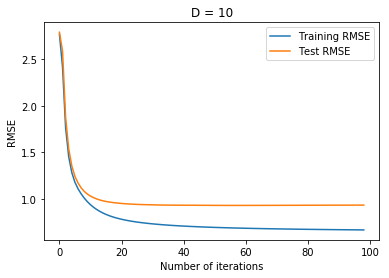

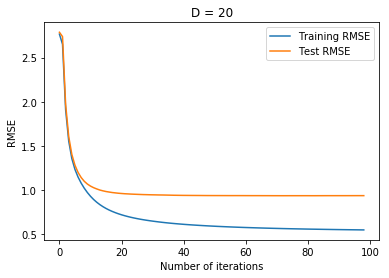

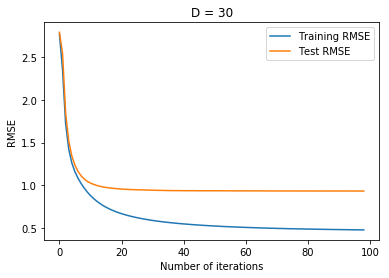

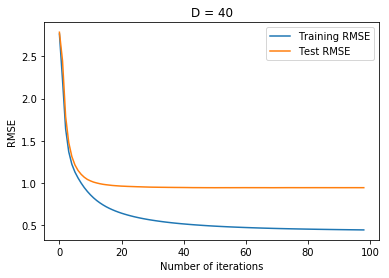

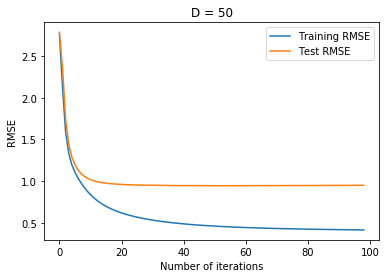

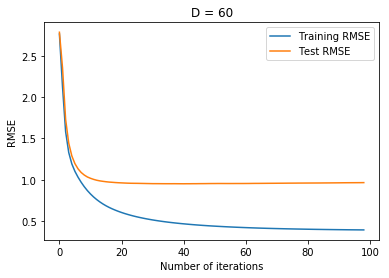

In [11]:
#f, a=plt.subplots()
for D in D_list:
    results_part=results.loc[results['D']==D]
    plt.xlabel('Number of iterations')
    plt.ylabel('RMSE')
    plt.plot(np.arange(len(results_part['train_err'])), results_part['train_err'], label='Training RMSE')
    plt.plot(np.arange(len(results_part['test_err'])), results_part['test_err'], label='Test RMSE')
    plt.legend()
    plt.title('D = '+ str(D))
    plt.show()

Now plot the final RMSE as function of the number of hidden features used:

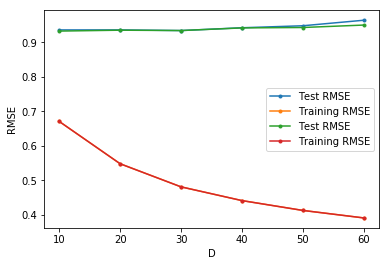

In [18]:
# f, a=plt.subplots()
final_results_test=[]
final_results_train=[]
best_results_test=[]
best_results_train=[]

for D in D_list:
    results_part=results.loc[results['D']==D]
    final_results_test.append(results_part['test_err'].iloc[len(results_part['test_err'])-1])
    final_results_train.append(results_part['train_err'].iloc[len(results_part['train_err'])-1])
    best_results_test.append(min(results_part['test_err']))
    best_results_train.append(min(results_part['train_err']))
    # plt.plot(np.arange(len(results_part['train_err'])),results_part['train_err'], label='D ='+str(D))
    # plt.plot(np.arange(len(results_part['train_err'])),results_part['test_err'], label='D ='+str(D))

plt.plot(D_list, final_results_test, marker='.', label='Test RMSE')
plt.plot(D_list, final_results_train, marker='.', label='Training RMSE')
plt.plot(D_list, best_results_test, marker='.', label='Test RMSE')
plt.plot(D_list, best_results_train, marker='.', label='Training RMSE')
    
plt.xlabel('D')
plt.ylabel('RMSE')
plt.legend()
#plt.title('Training losss')
    
plt.show()

In [20]:
[best_results_test[i]==final_results_test[i] for i in range(len(best_results_test))]

[False, False, True, False, False, False]

In [19]:
[best_results_train[i]==final_results_train[i] for i in range(len(best_results_train))]

[True, True, True, True, True, True]

# Latest-small example: